In [1]:
!pip install imageio


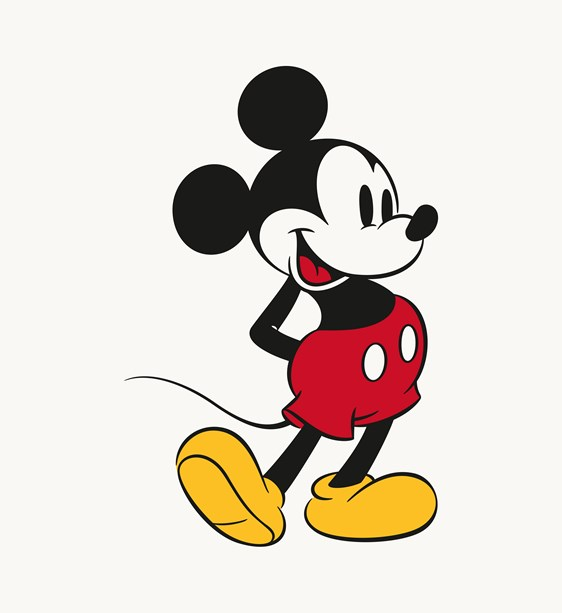

In [34]:
%matplotlib inline
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp

#Display the image from the web using an URI.
img="https://www.ixxiyourworld.com/media/1676571/Mickey-Mouse-2.jpg?mode=crop&width=562&height=613"
dp.Image(requests.get(img).content)

In [35]:
source_img = imageio.imread(img)

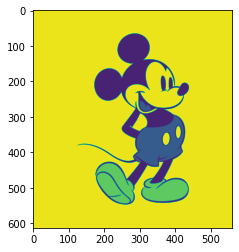

In [36]:
import numpy as np

def grayscaleimg(rgb): 
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

gryscl_img = grayscaleimg(source_img)
plt.imshow(gryscl_img)

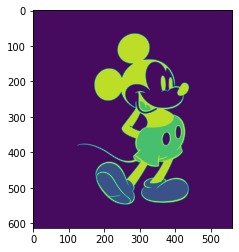

In [37]:
inv_img = (255 - gryscl_img)
plt.imshow(inv_img)

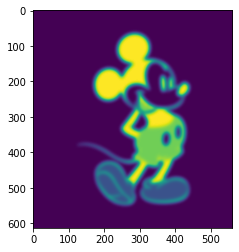

In [38]:
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurred_img)

In [39]:
def dodging(blur_img, gryscl_img):
    resultant_dodge=blur_img*255/(255-gryscl_img) 
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gryscl_img==255]=255
    return resultant_dodge.astype('uint8')

In [40]:
target_img= dodging(blurred_img, gryscl_img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


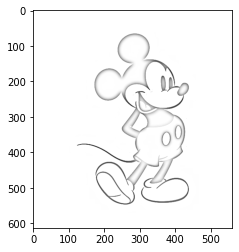

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img, cmap="gray")

In [42]:
plt.imsave('target_image.png', target_img, cmap='gray', vmin=0, vmax=255)